In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
base=tf.keras.applications.DenseNet121(include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv5_block15_2_conv (Conv2D)   (None, None, None, 3 36864       conv5_block15_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_concat (Concatena (None, None, None, 9 0           conv5_block14_concat[0][0]       
                                                                 conv5_block15_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block16_0_bn (BatchNormal (None, None, None, 9 3968        conv5_block15_concat[0][0]       
__________________________________________________________________________________________________
conv5_block16_0_relu (Activatio (None, None, None, 9 0           conv5_block16_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block16_1_conv (Conv2D)   (None, None, None, 1 126976      conv5_block16_0_relu[0][0]       
__________

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train=ImageDataGenerator(rescale=1/255)

In [6]:
test=ImageDataGenerator(rescale=1/255)

In [7]:
train_df=pd.read_csv('./raiox_treino/train-small1.csv')
train_df['Hernia']=list(train_df['Finding Labels']=='Hernia')
train_df

,Image,Finding Labels,Follow-up #,patient_id,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,False
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,False
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,False
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,False
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,True
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,True
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,True
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN,False
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN,True
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN,True


In [8]:
train_i=train.flow_from_dataframe(dataframe=train_df,
                                  directory='./raiox_treino',
                                  target_size=(128,128),
                                  x_col="Image",
                                  y_col=['Hernia'],
                                  batch_size=128,
                                  class_mode="raw")

Found 23 validated image filenames.


In [9]:
test_df=pd.read_csv('./raiox_treino/valid-small1.csv')
#test_df=pd.read_csv('./raiox_treino/Data_Entry_2017.csv')
test_df['Hernia']=list(test_df['Finding Labels']=='Hernia')
#test_df[test_df['Hernia']==1].iloc[35:,:].head(20).to_csv('teste2.csv')
#test_df

In [10]:
test_i=test.flow_from_dataframe(dataframe=test_df,
                          directory='./raiox_treino',
                          target_size=(128,128),
                          x_col="Image",
                          y_col=['Hernia'],
                          batch_size=128,
                          class_mode='raw'
                          )

Found 17 validated image filenames.


/home/naubergois/miniconda3/envs/nauber/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 18 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [11]:
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()(base.output)
predictions= tf.keras.layers.Dense(units=1,activation='sigmoid') (global_average_layer)
model=tf.keras.models.Model(inputs=base.input,outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv3_block5_concat (Concatenat (None, None, None, 2 0           conv3_block4_concat[0][0]        
                                                                 conv3_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block6_0_bn (BatchNormali (None, None, None, 2 1152        conv3_block5_concat[0][0]        
__________________________________________________________________________________________________
conv3_block6_0_relu (Activation (None, None, None, 2 0           conv3_block6_0_bn[0][0]          
__________________________________________________________________________________________________
conv3_block6_1_conv (Conv2D)    (None, None, None, 1 36864       conv3_block6_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block6_1_bn (BatchNormali (None, None, None, 1 512         conv3_block6_1_conv[0][0]        
__________

__________________________________________________________________________________________________
conv5_block2_0_bn (BatchNormali (None, None, None, 5 2176        conv5_block1_concat[0][0]        
__________________________________________________________________________________________________
conv5_block2_0_relu (Activation (None, None, None, 5 0           conv5_block2_0_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_1_conv (Conv2D)    (None, None, None, 1 69632       conv5_block2_0_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, None, None, 1 512         conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, None, None, 1 0           conv5_block2_1_bn[0][0]          
__________

conv5_block9_1_bn (BatchNormali (None, None, None, 1 512         conv5_block9_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block9_1_relu (Activation (None, None, None, 1 0           conv5_block9_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block9_2_conv (Conv2D)    (None, None, None, 3 36864       conv5_block9_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block9_concat (Concatenat (None, None, None, 8 0           conv5_block8_concat[0][0]        
                                                                 conv5_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block10_0_bn (BatchNormal (None, None, None, 8 3200        conv5_block9_concat[0][0]        
__________

Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
__________________________________________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit_generator(train_i,
                   validation_data=test_i,
                   steps_per_epoch=100,
                   validation_steps=10,
                   epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
100/100 [==============================] - 324s 3s/step - loss: 0.0129 - val_loss: 1.1055
Epoch 2/3
100/100 [==============================] - 333s 3s/step - loss: 3.5284e-06 - val_loss: 1.6865
Epoch 3/3
100/100 [==============================] - 348s 3s/step - loss: 2.0634e-06 - val_loss: 1.6281


In [19]:
from tensorflow.keras.models import model_from_yaml
model.save_weights('transfermodel.h5')

Error in generating ROC curve for Cardiomegaly|Emphysema. Dataset lacks enough examples.
Error in generating ROC curve for Cardiomegaly|Effusion. Dataset lacks enough examples.
Error in generating ROC curve for No Finding. Dataset lacks enough examples.
Error in generating ROC curve for Hernia. Dataset lacks enough examples.
Error in generating ROC curve for Hernia|Infiltration. Dataset lacks enough examples.
Error in generating ROC curve for Mass|Nodule. Dataset lacks enough examples.
Error in generating ROC curve for Infiltration. Dataset lacks enough examples.
Error in generating ROC curve for Effusion|Infiltration. Dataset lacks enough examples.


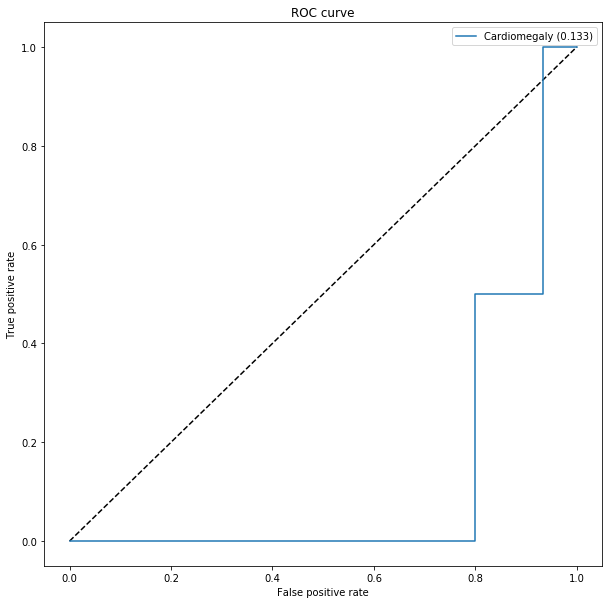

In [59]:
import util1
IMAGE_DIR = "raiox_treino/"
df = pd.read_csv("raiox_treino/train-small.csv")

predicted_vals = model.predict_generator(test_i, steps = len(test_i))
auc_rocs = util1.get_roc_curve(labels, predicted_vals, test_i)


['Cardiomegaly' 'Cardiomegaly|Emphysema' 'Cardiomegaly|Effusion'
 'No Finding' 'Hernia' 'Hernia|Infiltration' 'Mass|Nodule' 'Infiltration'
 'Effusion|Infiltration']
['Cardiomegaly']
Loading original image
Generating gradcam for class Cardiomegaly


/home/naubergois/git/uni7fundamentosdatascience/codigo/util1.py:57: RuntimeWarning: invalid value encountered in true_divide
  cam = np.maximum(cam, 0)
/home/naubergois/miniconda3/envs/nauber/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/naubergois/miniconda3/envs/nauber/lib/python3.6/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/naubergois/miniconda3/envs/nauber/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/naubergois/miniconda3/envs/nauber/lib/python3.6/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/naubergois/miniconda3/envs/nauber/lib/pytho

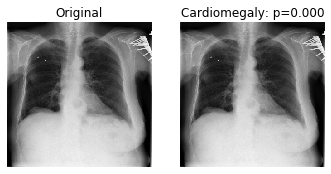

In [60]:
print(labels)
# only show the labels with top 4 AUC
labels_to_show = np.take(labels, np.argsort(auc_rocs)[::-1])[:4]
print(labels_to_show)
util1.compute_gradcam(model, '00000003_000.png', IMAGE_DIR, df, labels,labels_to_show  )

In [61]:
predictions

<tf.Tensor 'dense/Sigmoid:0' shape=(?, 1) dtype=float32>

In [62]:
test_df

,Image,Finding Labels,Follow-up #,patient_id,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Hernia
0,00000012_000.png,Effusion|Mass,0,12,76,M,PA,2992,2991,0.143000,0.143000,NaN,False
1,00000013_000.png,No Finding,0,13,61,M,PA,2021,2021,0.194311,0.194311,NaN,False
2,00000013_001.png,Emphysema|Pneumothorax,1,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
3,00000013_002.png,Emphysema|Pneumothorax,2,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
4,00000013_003.png,Pleural_Thickening,3,13,60,M,AP,2996,2544,0.139000,0.139000,NaN,False
5,00000013_004.png,Effusion|Emphysema|Infiltration|Pneumothorax,4,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
6,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
7,00000013_006.png,Effusion|Infiltration,6,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
8,00000013_007.png,Infiltration,7,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False
9,00000013_008.png,No Finding,8,13,60,M,AP,3056,2544,0.139000,0.139000,NaN,False


In [27]:
train_df

,Image,Finding Labels,Follow-up #,patient_id,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,False
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,False
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,False
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,False
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,True
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,True
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,True
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN,False
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN,True
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN,True
